# Image Segmentation - Part 3: Supervised Machine Learning

In [1]:
%matplotlib widget
import matplotlib
from plantcv import plantcv as pcv

In [2]:
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

In [3]:
pcv.__version__

'3.13.2'

## Naive Bayes (supervised machine learning)

To collect training data, download the program [ImageJ](https://imagej.nih.gov/ij/download.html). We will use the tool "Pixel Inspector" to collect color values.

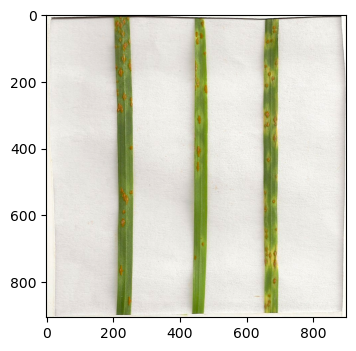

In [4]:
# Open image
color_img, _, _ = pcv.readimage(filename="./images/wheat_rust1.png")

In the image we are interested in identifying pixels that belong to four different groups (or classes):

`Leaf`: the green parts of the wheat leaves

`Pustule`: the red/orange wheat rust infection foci

`Chlorosis`: the yellowing around each pustule

`Background`: Everything that does not belong to one of the other three categories

We will collect RGB values from the image by clicking on examples of each class and organizing the values in a file called `rgb_values.txt` with this format:

```
#plant
96,154,72	95,153,72	91,155,71	91,160,70	90,155,67	92,152,66	92,157,70
54,104,39	56,104,38	59,106,41	57,105,43	54,104,40	54,103,35	56,101,39	58,99,41	59,99,41
#background
114,127,121	117,135,125	120,137,131	132,145,138	142,154,148	151,166,158	160,182,172
115,125,121	118,131,123	122,132,135	133,142,144	141,151,152	150,166,158	159,179,172
```

After the table is created we need to reformat it for use in PlantCV using a command-line utility:

```bash
plantcv-utils.py tabulate_bayes_classes -i rgb_values.txt -o pixel_values.txt

```

Then we use this table to train the naive Bayes classifier using another command-line utility:

```bash
plantcv-train.py naive_bayes_multiclass -f pixel_values.txt -o nb_model.txt -p

```

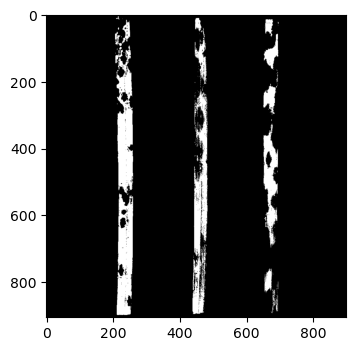

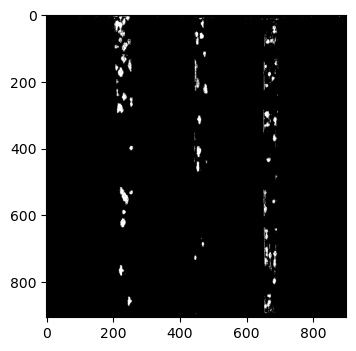

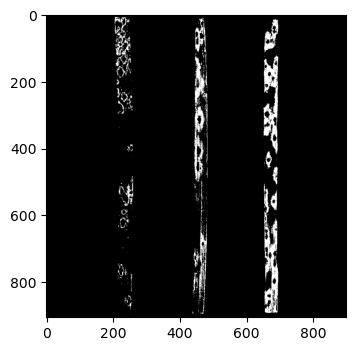

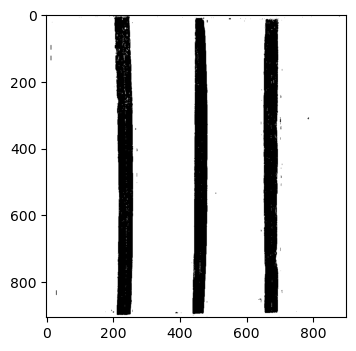

In [5]:
# Use the trained model to segment the image
masks = pcv.naive_bayes_classifier(rgb_img=color_img, pdf_file="example_data/nb_model.txt")

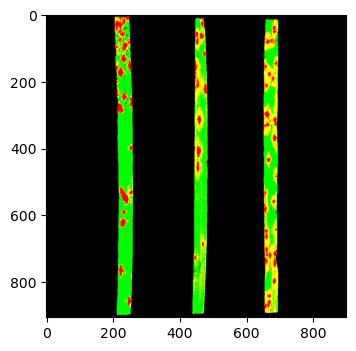

In [6]:
# Colorize the three foreground classes
merged_mask = pcv.visualize.colorize_masks(masks=[masks["leaf"], masks["pustule"], masks["chlorosis"]], colors=["green", "red", "yellow"])

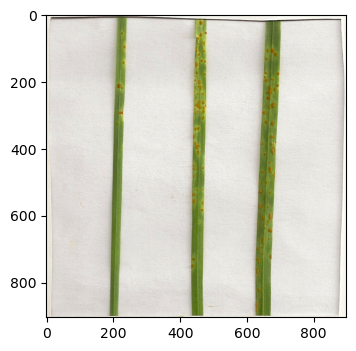

In [7]:
# Test the model on an unseen image
color_img, _, _ = pcv.readimage(filename="./images/wheat_rust2.png")

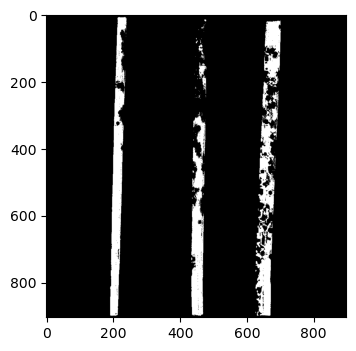

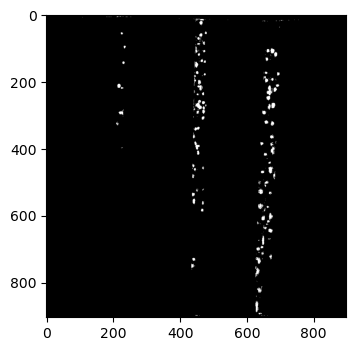

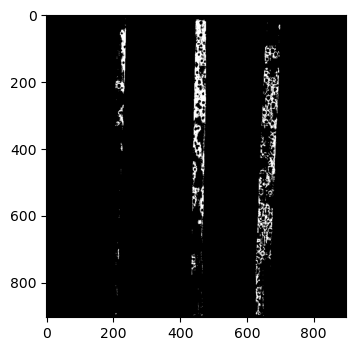

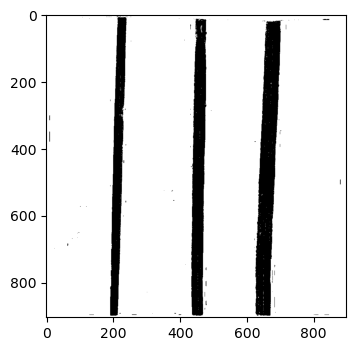

In [8]:
masks = pcv.naive_bayes_classifier(rgb_img=color_img, pdf_file="nb_model.txt")

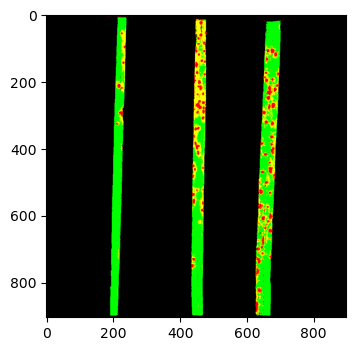

In [9]:
# Colorize the three foreground classes
merged_mask = pcv.visualize.colorize_masks(masks=[masks["leaf"], masks["pustule"], masks["chlorosis"]], colors=["green", "red", "yellow"])